# Load data

In [1]:
# Extracting zip file
import zipfile

with zipfile.ZipFile("Data.zip", "r") as zip_ref:
    zip_ref.extractall("unzipped_data")

In [2]:
import pandas as pd
# Reading energy data file
energy_data = pd.read_csv("Data.csv")
data = pd.read_excel('Kalam Climate Data.xlsx')

# Convert to CSV
data.to_csv('Kalam Climate Data.csv', index=False)
# Reading climate file
climate_data=pd.read_csv('Kalam Climate Data.csv')


In [3]:
energy_data.head()

,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device_9,consumer_device_x
0,2024-07-22 18:20:00,137.65,0.08,0.72,0.000661,consumer_device_10_data_user_1,NaN,NaN,0.0,10.0
1,2024-07-22 18:25:00,122.82,0.08,0.73,0.000598,consumer_device_10_data_user_1,NaN,NaN,0.0,10.0
2,2024-07-22 18:30:00,119.70,0.08,0.74,0.000591,consumer_device_10_data_user_1,NaN,NaN,0.0,10.0
3,2024-07-22 18:35:00,124.53,0.08,0.75,0.000623,consumer_device_10_data_user_1,NaN,NaN,0.0,10.0
4,2024-07-22 18:40:00,134.84,0.08,0.74,0.000665,consumer_device_10_data_user_1,NaN,NaN,0.0,10.0


In [4]:
energy_data.shape

(2213046, 10)

In [5]:
energy_data.columns

Index(['date_time', 'v_red', 'current', 'power_factor', 'kwh', 'Source',
       'v_blue', 'v_yellow', 'consumer_device_9', 'consumer_device_x'],
      dtype='object')

# Cleaning energy data for climate analysis

In [6]:
print(energy_data[['consumer_device_9', 'consumer_device_x']].describe())
print(energy_data[['consumer_device_9', 'consumer_device_x','Source']].nunique())


       consumer_device_9  consumer_device_x
count          2213045.0       2.213045e+06
mean                 0.0       1.086422e+01
std                  0.0       3.768799e-01
min                  0.0       1.000000e+01
25%                  0.0       1.100000e+01
50%                  0.0       1.100000e+01
75%                  0.0       1.100000e+01
max                  0.0       1.200000e+01
consumer_device_9     1
consumer_device_x     3
Source               38
dtype: int64


In [7]:
# Dropping unnecessary column
energy_data = energy_data.drop(columns=['consumer_device_9'])
energy_data = energy_data.drop(columns=['consumer_device_x'])

In [8]:
energy_data['Source'].unique()

array(['consumer_device_10_data_user_1',
       'consumer_device_10_data_user_10',
       'consumer_device_10_data_user_11',
       'consumer_device_10_data_user_12',
       'consumer_device_10_data_user_13',
       'consumer_device_10_data_user_14',
       'consumer_device_10_data_user_15',
       'consumer_device_10_data_user_16',
       'consumer_device_10_data_user_17',
       'consumer_device_10_data_user_18',
       'consumer_device_10_data_user_2', 'consumer_device_10_data_user_3',
       'consumer_device_10_data_user_4', 'consumer_device_10_data_user_5',
       'consumer_device_10_data_user_6', 'consumer_device_10_data_user_7',
       'consumer_device_10_data_user_8', 'consumer_device_10_data_user_9',
       'consumer_device_11_data_user_1',
       'consumer_device_11_data_user_10',
       'consumer_device_11_data_user_11',
       'consumer_device_11_data_user_12',
       'consumer_device_11_data_user_13',
       'consumer_device_11_data_user_14',
       'consumer_device_11_dat

In [9]:
# Seperating columns for consumer device and data user
energy_data[['consumer_device', 'data_user']] = energy_data['Source'].str.extract(r'(consumer_device_\d+)_data_user_(\d+)')
energy_data.head()

,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device,data_user
0,2024-07-22 18:20:00,137.65,0.08,0.72,0.000661,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1
1,2024-07-22 18:25:00,122.82,0.08,0.73,0.000598,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1
2,2024-07-22 18:30:00,119.70,0.08,0.74,0.000591,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1
3,2024-07-22 18:35:00,124.53,0.08,0.75,0.000623,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1
4,2024-07-22 18:40:00,134.84,0.08,0.74,0.000665,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1


In [10]:
print(energy_data[['consumer_device', 'data_user']].nunique())

consumer_device     3
data_user          18
dtype: int64


In [11]:
# Converting date_time column to datetime
energy_data['date_time'] = pd.to_datetime(energy_data['date_time'], errors='coerce')

In [12]:
# Dropping null values
energy_data = energy_data.dropna(subset=['consumer_device', 'data_user'])

In [13]:
print(energy_data['date_time'].min())
print(energy_data['date_time'].max())

2023-10-01 14:35:00
2024-09-23 23:55:00


# Climate data

In [14]:
# Climate data
climate_data.head(10)

,Date Time,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),V Wind Component (m/s),Total Precipitation (mm),Snowfall (mm),Snow Cover (%)
0,2023-06-03 13:00:00,7.199731,-2.448126,-0.034195,0.060989,0.000377,0.0,99.972656
1,2023-06-03 14:00:00,6.000620,-2.597540,-0.080688,0.018585,0.000398,0.0,99.972656
2,2023-06-03 15:00:00,4.789972,-2.696951,0.057449,-0.352020,0.000418,0.0,99.972656
3,2023-06-03 16:00:00,3.158746,-2.879324,0.051529,-0.608948,0.000420,0.0,99.972656
4,2023-06-03 17:00:00,1.671426,-3.255606,0.056137,-0.739838,0.000420,0.0,99.972656
5,2023-06-03 18:00:00,0.660638,-3.664709,0.033340,-0.815216,0.000420,0.0,99.972656
6,2023-06-03 19:00:00,0.499902,-3.005972,0.071854,-0.892014,0.000420,0.0,99.972656
7,2023-06-03 20:00:00,-0.143439,-3.434775,0.071381,-0.945694,0.000421,0.0,99.972656
8,2023-06-03 21:00:00,-0.676047,-3.869360,0.045181,-0.974213,0.000421,0.0,99.972656
9,2023-06-03 22:00:00,-1.184607,-4.285437,0.016556,-0.991074,0.000421,0.0,99.972656


In [15]:
climate_data.isna().sum()

Date Time                    0
Temperature (°C)             0
Dewpoint Temperature (°C)    0
U Wind Component (m/s)       0
V Wind Component (m/s)       0
Total Precipitation (mm)     0
Snowfall (mm)                0
Snow Cover (%)               0
dtype: int64

In [16]:
# Checking time period
print(climate_data['Date Time'].min())
print(climate_data['Date Time'].max())

2023-06-03 13:00:00
2024-10-25 00:00:00


# Merge energy and climate data 

In [17]:
# Extracting date column
df=energy_data.copy()
df['date']=df['date_time'].dt.date
df.head()

,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device,data_user,date
0,2024-07-22 18:20:00,137.65,0.08,0.72,0.000661,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1,2024-07-22
1,2024-07-22 18:25:00,122.82,0.08,0.73,0.000598,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1,2024-07-22
2,2024-07-22 18:30:00,119.70,0.08,0.74,0.000591,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1,2024-07-22
3,2024-07-22 18:35:00,124.53,0.08,0.75,0.000623,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1,2024-07-22
4,2024-07-22 18:40:00,134.84,0.08,0.74,0.000665,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1,2024-07-22


In [18]:
# Preprocessing climate data
climate_data['date']=pd.to_datetime(climate_data['Date Time']).dt.date

In [19]:
climate_data.shape

(12228, 9)

In [20]:
print(df['date'].duplicated().sum())  
print(climate_data['date'].duplicated().sum())  

2212686
11717


In [21]:
# Removing duplicate
df = df.drop_duplicates(subset=['date'])
climate_data = climate_data.drop_duplicates(subset=['date'])

In [22]:
df.shape

(359, 11)

In [23]:
climate_data.shape

(511, 9)

In [24]:
# CLimate analysis on kwh by merging both dataset
merged_data = df[['kwh','date']].merge(climate_data, on='date', how='inner')
merged_data.head()

,kwh,date,Date Time,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),V Wind Component (m/s),Total Precipitation (mm),Snowfall (mm),Snow Cover (%)
0,0.000661,2024-07-22,2024-07-22 00:00:00,8.071375,7.764795,0.118622,-0.772707,0.006095,0.0,0.0
1,0.000065,2024-07-23,2024-07-23 00:00:00,10.077631,8.438165,0.025269,-0.636082,0.006639,0.0,0.0
2,0.000376,2024-07-24,2024-07-24 00:00:00,6.741495,6.430048,0.081802,-0.878043,0.008502,0.0,0.0
3,0.000000,2024-07-25,2024-07-25 00:00:00,6.669794,6.424600,0.057144,-0.895325,0.007558,0.0,0.0
4,0.000000,2024-07-26,2024-07-26 00:00:00,8.119745,7.045419,0.116318,-0.909978,0.001927,0.0,0.0


In [25]:
merged_data = merged_data.drop(columns=['Date Time'])

# Climate analysis

In [26]:
# Setting date as index
merged_data.set_index('date', inplace=True)
merged_data.head()

,kwh,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),V Wind Component (m/s),Total Precipitation (mm),Snowfall (mm),Snow Cover (%)
date,,,,,,,,
2024-07-22,0.000661,8.071375,7.764795,0.118622,-0.772707,0.006095,0.0,0.0
2024-07-23,0.000065,10.077631,8.438165,0.025269,-0.636082,0.006639,0.0,0.0
2024-07-24,0.000376,6.741495,6.430048,0.081802,-0.878043,0.008502,0.0,0.0
2024-07-25,0.000000,6.669794,6.424600,0.057144,-0.895325,0.007558,0.0,0.0
2024-07-26,0.000000,8.119745,7.045419,0.116318,-0.909978,0.001927,0.0,0.0


In [27]:
merged_data.shape

(359, 8)

In [28]:
merged_data.columns

Index(['kwh', 'Temperature (°C)', 'Dewpoint Temperature (°C)',
       'U Wind Component (m/s)', 'V Wind Component (m/s)',
       'Total Precipitation (mm)', 'Snowfall (mm)', 'Snow Cover (%)'],
      dtype='object')

In [29]:
merged_data.describe()

,kwh,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),V Wind Component (m/s),Total Precipitation (mm),Snowfall (mm),Snow Cover (%)
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,3.590000e+02,359.000000
mean,0.001270,-4.405066,-9.035864,-0.015062,-0.882931,0.003887,2.593528e-03,68.434938
std,0.013754,9.358196,12.226203,0.110248,0.344427,0.008551,8.504576e-03,44.533634
min,0.000000,-20.944113,-32.589651,-0.740860,-1.452682,0.000000,0.000000e+00,0.000000
25%,0.000000,-12.657622,-19.794028,-0.054161,-1.149651,0.000004,0.000000e+00,2.192383
50%,0.000000,-5.258414,-8.935492,0.001068,-0.950943,0.000780,3.540000e-07,99.972656
75%,0.000000,3.901071,1.593752,0.045326,-0.675276,0.003748,3.625000e-04,99.972656
max,0.193440,13.753839,13.583215,0.329865,0.569635,0.062579,6.250127e-02,99.972656


In [30]:
# Sorting data by date
merged_data = merged_data.sort_values(by='date')
merged_data.head()

,kwh,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),V Wind Component (m/s),Total Precipitation (mm),Snowfall (mm),Snow Cover (%)
date,,,,,,,,
2023-10-01,0.036038,-11.923697,-13.569373,0.081131,-1.373014,0.000934,0.000203,85.123047
2023-10-02,0.002866,-4.094244,-9.247549,0.102844,-0.977808,0.000018,0.000004,63.759766
2023-10-03,0.000000,-6.890067,-7.746405,0.036514,-1.204395,0.000781,0.000125,38.888672
2023-10-04,0.028024,-4.338385,-6.422812,0.042221,-1.112228,0.000378,0.000004,21.462891
2023-10-05,0.000000,-3.064627,-8.241599,-0.031830,-1.158936,0.000008,0.000000,11.185547


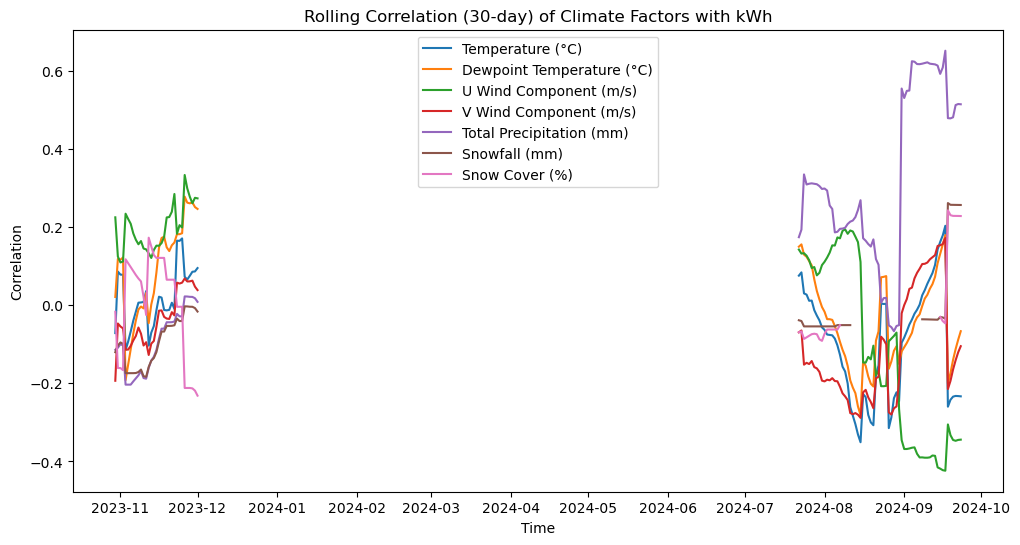

In [31]:
import matplotlib.pyplot as plt  

# Define climate factors  
climate_factors = ["Temperature (°C)", "Dewpoint Temperature (°C)", "U Wind Component (m/s)",  
                   "V Wind Component (m/s)", "Total Precipitation (mm)", "Snowfall (mm)", "Snow Cover (%)"]

# Ensure numeric data  
numeric_data = merged_data[['kwh'] + climate_factors].dropna()

# Compute rolling correlation  
rolling_corr = numeric_data.rolling(30).corr(numeric_data['kwh'])

# Plot rolling correlation of kWh with each climate factor  
plt.figure(figsize=(12, 6))  
for factor in climate_factors:  
    rolling_corr[factor].plot(label=factor)  

plt.title("Rolling Correlation (30-day) of Climate Factors with kWh")  
plt.xlabel("Time")  
plt.ylabel("Correlation")  
plt.legend()  
plt.show()


In [32]:
# To capture linear relationships
# Compute average correlation for each climate factor with kWh
average_corr = rolling_corr.mean()

# Sort by absolute correlation values to see strongest factors
sorted_corr = average_corr.sort_values(ascending=False)

# Display results
print("Average Rolling Correlation with kWh:")
print(sorted_corr)


Average Rolling Correlation with kWh:
kwh                          1.000000
Total Precipitation (mm)     0.184637
Snow Cover (%)               0.000999
Dewpoint Temperature (°C)    0.000072
U Wind Component (m/s)      -0.011949
Snowfall (mm)               -0.043103
Temperature (°C)            -0.057935
V Wind Component (m/s)      -0.087215
dtype: float64


In [33]:
# To capture linear relationship for non zero kwh values
# Remove rows where kWh is 0
filtered_data = numeric_data[numeric_data['kwh'] != 0]

# Compute rolling correlation
rolling_corr_filtered = filtered_data.rolling(30).corr(filtered_data['kwh'])

# Compute average correlation
average_corr_filtered = rolling_corr_filtered.mean()
print(average_corr_filtered.sort_values(ascending=False))


kwh                          1.000000
Total Precipitation (mm)     0.497901
Dewpoint Temperature (°C)    0.059646
Temperature (°C)             0.005317
Snowfall (mm)               -0.045117
V Wind Component (m/s)      -0.048450
Snow Cover (%)              -0.093826
U Wind Component (m/s)      -0.330885
dtype: float64


In [34]:
# To capture non linear relationships for non zero kwh values
from sklearn.ensemble import RandomForestRegressor

climate_factors = ['Total Precipitation (mm)', 'Dewpoint Temperature (°C)',
                   'Temperature (°C)', 'Snowfall (mm)', 'V Wind Component (m/s)',
                   'Snow Cover (%)', 'U Wind Component (m/s)']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(filtered_data[climate_factors], filtered_data['kwh'])

feature_importance = pd.Series(rf.feature_importances_, index=climate_factors).sort_values(ascending=False)
print("Feature Importance from Random Forest:\n", feature_importance)


Feature Importance from Random Forest:
 Total Precipitation (mm)     0.291491
V Wind Component (m/s)       0.269623
U Wind Component (m/s)       0.170551
Snowfall (mm)                0.086874
Temperature (°C)             0.072001
Snow Cover (%)               0.060230
Dewpoint Temperature (°C)    0.049230
dtype: float64


# Energy data

In [35]:
energy_data.head()

,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device,data_user
0,2024-07-22 18:20:00,137.65,0.08,0.72,0.000661,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1
1,2024-07-22 18:25:00,122.82,0.08,0.73,0.000598,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1
2,2024-07-22 18:30:00,119.70,0.08,0.74,0.000591,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1
3,2024-07-22 18:35:00,124.53,0.08,0.75,0.000623,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1
4,2024-07-22 18:40:00,134.84,0.08,0.74,0.000665,consumer_device_10_data_user_1,NaN,NaN,consumer_device_10,1


In [36]:
# Sorting data by date
energy_data = energy_data.sort_values(by='date_time',ascending=True)
energy_data

,date_time,v_red,current,power_factor,kwh,Source,v_blue,v_yellow,consumer_device,data_user
1050335,2023-10-01 14:35:00,169.26,0.28,0.24,0.000948,consumer_device_11_data_user_16,NaN,NaN,consumer_device_11,16
740684,2023-10-01 14:35:00,169.26,0.08,0.75,0.000846,consumer_device_11_data_user_13,NaN,NaN,consumer_device_11,13
1979288,2023-10-01 14:35:00,NaN,2.68,0.64,0.024536,consumer_device_11_data_user_8,171.66,NaN,consumer_device_11,8
2082505,2023-10-01 14:35:00,NaN,0.20,0.24,0.000687,consumer_device_11_data_user_9,NaN,171.66,consumer_device_11,9
534250,2023-10-01 14:35:00,NaN,0.12,0.25,0.000429,consumer_device_11_data_user_11,171.66,NaN,consumer_device_11,11
...,...,...,...,...,...,...,...,...,...,...
1153551,2024-09-23 23:55:00,210.10,0.00,0.00,0.000000,consumer_device_11_data_user_16,NaN,NaN,consumer_device_11,16
1876070,2024-09-23 23:55:00,NaN,0.00,0.00,0.000000,consumer_device_11_data_user_6,NaN,0.00,consumer_device_11,6
843900,2024-09-23 23:55:00,210.10,0.00,0.00,0.000000,consumer_device_11_data_user_13,NaN,NaN,consumer_device_11,13
2082504,2024-09-23 23:55:00,NaN,0.00,0.00,0.000000,consumer_device_11_data_user_8,0.00,NaN,consumer_device_11,8


# Preprocessing the energy data

In [37]:
energy_data.isna().sum()

date_time                0
v_red              1457148
current                  0
power_factor             0
kwh                      0
Source                   0
v_blue             1484471
v_yellow           1484471
consumer_device          0
data_user                0
dtype: int64

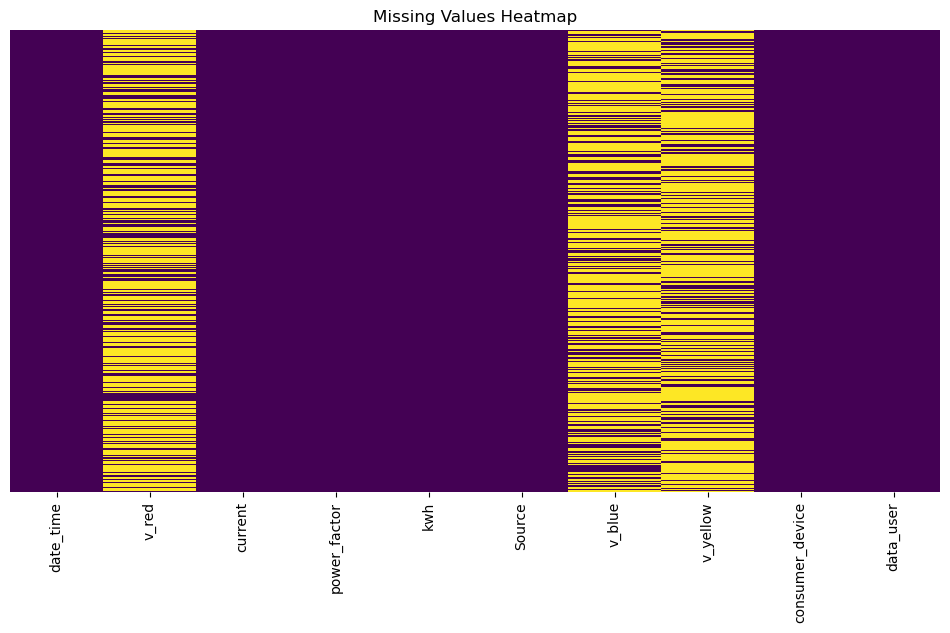

In [38]:
# Checking for patterns in missing values of v_red
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(energy_data.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [39]:
# Identify single-phase and three-phase houses
energy_data['is_single_phase'] = energy_data.apply(
    lambda row: True if pd.notna(row['v_red']) and pd.isna(row['v_blue']) and pd.isna(row['v_yellow']) else False, axis=1
)

# Fill missing values based on phase type

# For single phase
energy_data.loc[energy_data['is_single_phase'], ['v_blue', 'v_yellow']] = 0  

# Forward filling voltages values for each consumer device
energy_data[['v_red', 'v_blue', 'v_yellow']] = (
    energy_data.groupby('Source')[['v_red', 'v_blue', 'v_yellow']].ffill()
)

# Interpolating rest values
energy_data[['v_red', 'v_blue', 'v_yellow']] = energy_data[['v_red', 'v_blue', 'v_yellow']].interpolate(method='linear')
data_with_no_nan = energy_data.copy()  
print(data_with_no_nan.isna().sum()) 


date_time          0
v_red              0
current            0
power_factor       0
kwh                0
Source             0
v_blue             0
v_yellow           0
consumer_device    0
data_user          0
is_single_phase    0
dtype: int64


# Plots

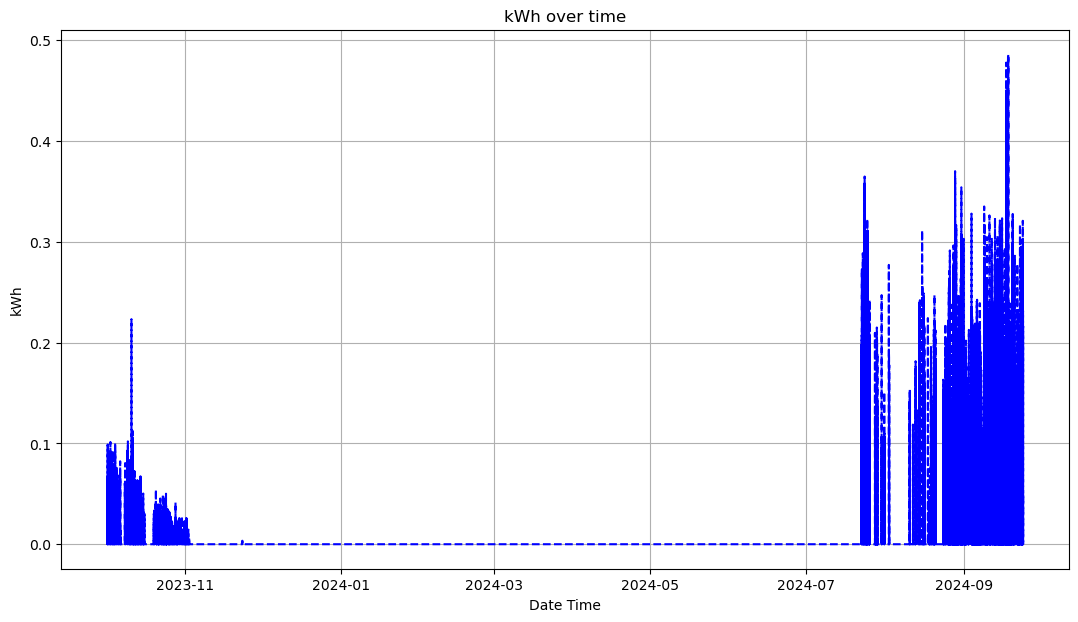

In [40]:
# Plotting kWh over time
plt.figure(figsize=(13, 7))
plt.plot(data_with_no_nan['date_time'], data_with_no_nan['kwh'],
         linestyle='dashed', color='blue')
plt.xlabel('Date Time')
plt.ylabel('kWh')
plt.title('kWh over time')
plt.grid()
plt.show()

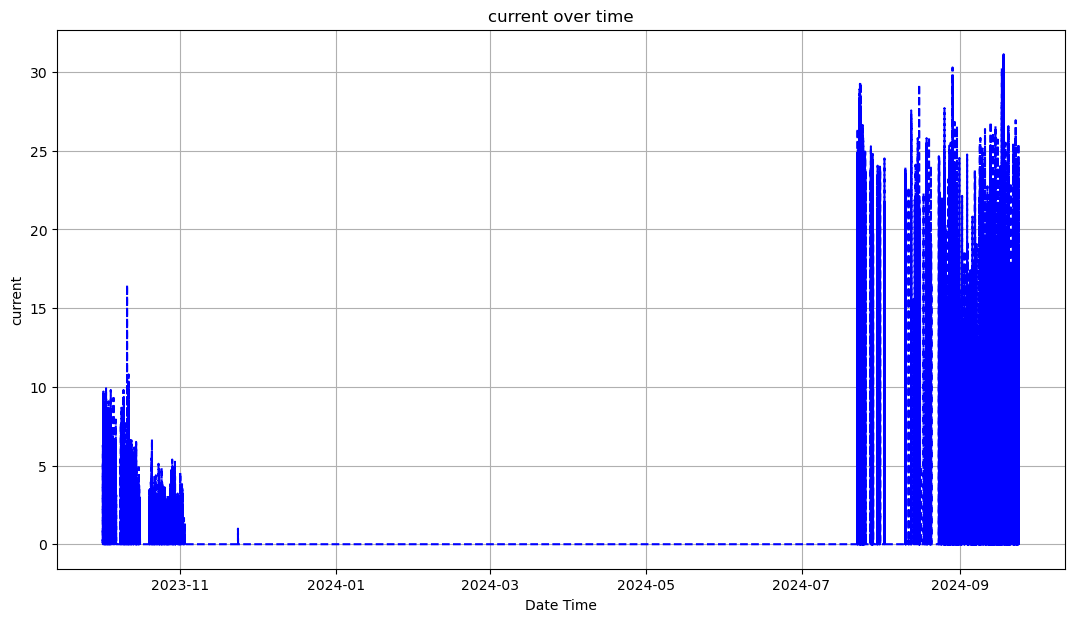

In [41]:
# Plotting current over time
plt.figure(figsize=(13, 7))
plt.plot(data_with_no_nan['date_time'], data_with_no_nan['current'],
         linestyle='dashed', color='blue')
plt.xlabel('Date Time')
plt.ylabel('current')
plt.title('current over time')
plt.grid()
plt.show()

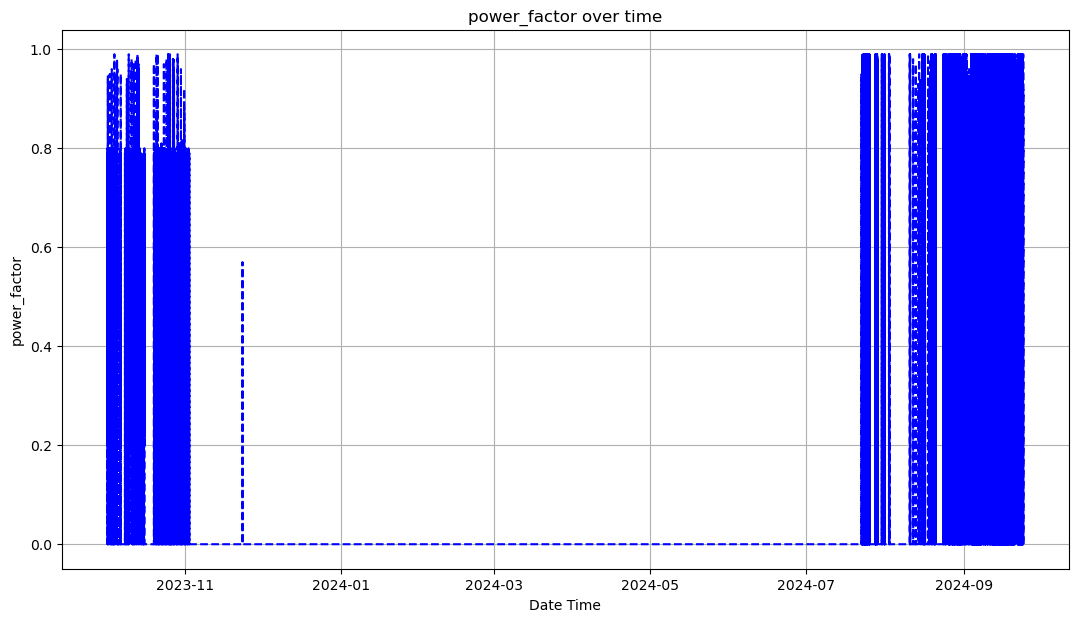

In [42]:
# Plotting power_factor over time
plt.figure(figsize=(13, 7))
plt.plot(data_with_no_nan['date_time'], data_with_no_nan['power_factor'],
         linestyle='dashed', color='blue')
plt.xlabel('Date Time')
plt.ylabel('power_factor')
plt.title('power_factor over time')
plt.grid()
plt.show()


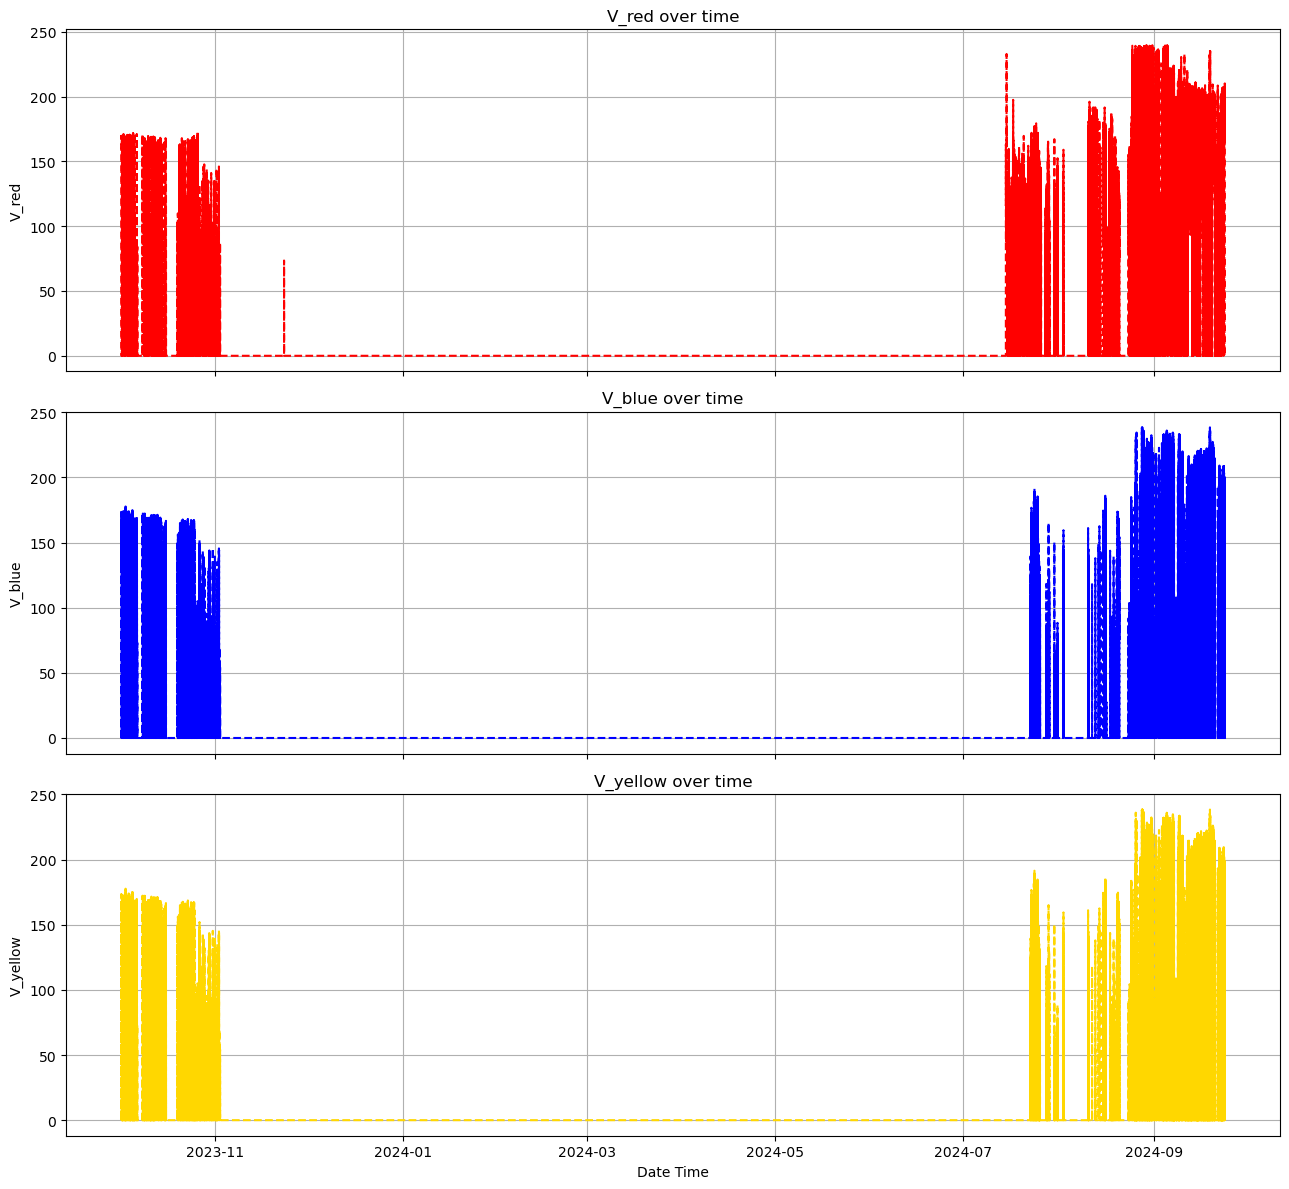

In [43]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (one for each voltage phase)
fig, axes = plt.subplots(3, 1, figsize=(13, 12), sharex=True)

# Plot v_red
axes[0].plot(data_with_no_nan['date_time'], data_with_no_nan['v_red'], linestyle='dashed', color='red')
axes[0].set_ylabel('V_red')
axes[0].set_title('V_red over time')
axes[0].grid()

# Plot v_blue
axes[1].plot(data_with_no_nan['date_time'], data_with_no_nan['v_blue'], linestyle='dashed', color='blue')
axes[1].set_ylabel('V_blue')
axes[1].set_title('V_blue over time')
axes[1].grid()

# Plot v_yellow
axes[2].plot(data_with_no_nan['date_time'], data_with_no_nan['v_yellow'], linestyle='dashed', color='gold')
axes[2].set_xlabel('Date Time')
axes[2].set_ylabel('V_yellow')
axes[2].set_title('V_yellow over time')
axes[2].grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



# Feature extraction 

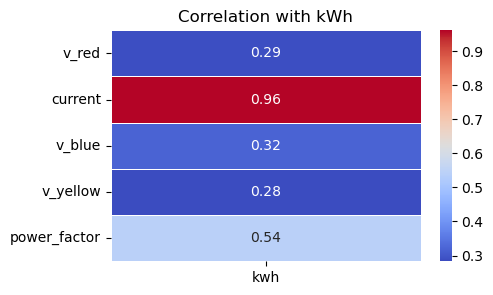

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation of 'kwh' with selected features
correlation_matrix = data_with_no_nan[['kwh', 'v_red', 'current','v_blue','v_yellow','power_factor']].corr()

# Keep only the correlation of 'kwh' with other features
correlation_kwh = correlation_matrix[['kwh']].drop(index='kwh')

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_kwh, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation with kWh")
plt.show()


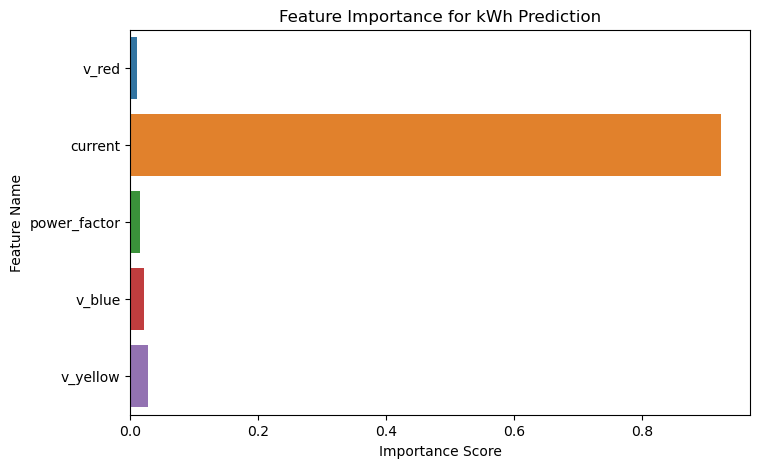

In [45]:
# Installing xgboost
!pip install -q xgboost

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features (excluding non-numeric and target variable)
features_imp = ['v_red', 'current', 'power_factor', 'v_blue', 'v_yellow']
X_1 = data_with_no_nan[features_imp]
y_1 = data_with_no_nan['kwh']

# Split data for training
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_1, y_1, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_set_scaled = scaler.fit_transform(X_train_set)

# Train XGBoost model
model = XGBRegressor()
model.fit(X_train_set_scaled, y_train_set)

# Get feature importance
feature_importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features_imp)
plt.title("Feature Importance for kWh Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


# Final formatted data

In [46]:
# Adding date column in scaled data
data_with_no_nan['Date'] = data_with_no_nan['date_time'].dt.date

In [47]:
# Aggregate kWh while keeping other features as mean for day wise prediction
aggregated_data = data_with_no_nan.groupby(['Source', 'Date']).agg({
    'kwh': 'sum',
    'v_red': 'mean',
    'v_blue': 'mean',
    'v_yellow': 'mean',
    'current': 'mean',
    'power_factor': 'mean',
    
}).reset_index()

# Display first few rows
aggregated_data.head()

,Source,Date,kwh,v_red,v_blue,v_yellow,current,power_factor
0,consumer_device_10_data_user_1,2024-07-22,0.024330,99.162941,0.0,0.0,0.079853,0.384118
1,consumer_device_10_data_user_1,2024-07-23,0.103560,101.665556,0.0,0.0,0.060486,0.342986
2,consumer_device_10_data_user_1,2024-07-24,0.137543,100.080938,0.0,0.0,0.074063,0.399896
3,consumer_device_10_data_user_1,2024-07-25,0.121011,101.122604,0.0,0.0,0.082743,0.356250
4,consumer_device_10_data_user_1,2024-07-26,0.000000,32.168472,0.0,0.0,0.000000,0.000000


In [48]:
# Counting the total days of power shutdowm
power_shutdown_counts = aggregated_data.groupby('Source').agg(
    Zero_kwh_Count=('kwh', lambda x: (x == 0).sum()),
    Total_Count=('kwh', 'count')
).reset_index()

print(power_shutdown_counts)

                             Source  Zero_kwh_Count  Total_Count
0    consumer_device_10_data_user_1              12           64
1   consumer_device_10_data_user_10              12           64
2   consumer_device_10_data_user_11              12           64
3   consumer_device_10_data_user_12              12           64
4   consumer_device_10_data_user_13              12           64
5   consumer_device_10_data_user_14              12           64
6   consumer_device_10_data_user_15              12           64
7   consumer_device_10_data_user_16              12           64
8   consumer_device_10_data_user_17              13           64
9   consumer_device_10_data_user_18              12           64
10   consumer_device_10_data_user_2              12           64
11   consumer_device_10_data_user_3              12           64
12   consumer_device_10_data_user_4              12           64
13   consumer_device_10_data_user_5              14           64
14   consumer_device_10_d

In [49]:
# Removing consumer_device_11 and consumer_device_12 due to their signal lacking
filtered_data = aggregated_data[~aggregated_data['Source'].isin(['consumer_device_11_data_user_1', 
                                                         'consumer_device_11_data_user_2',
                                                         'consumer_device_11_data_user_3',
                                                         'consumer_device_11_data_user_4',
                                                         'consumer_device_11_data_user_5',
                                                         'consumer_device_11_data_user_6',
                                                         'consumer_device_11_data_user_7',
                                                         'consumer_device_11_data_user_8',
                                                         'consumer_device_11_data_user_9',
                                                         'consumer_device_11_data_user_10',
                                                         'consumer_device_11_data_user_11',
                                                         'consumer_device_11_data_user_12',
                                                         'consumer_device_11_data_user_13',
                                                         'consumer_device_11_data_user_14',
                                                         'consumer_device_11_data_user_15',
                                                         'consumer_device_11_data_user_16',
                                                         'consumer_device_11_data_user_17',
                                                         'consumer_device_11_data_user_18',
                                                         'consumer_device_12_data_user_1',
                                                         'consumer_device_12_data_user_9'])]

# Reset index after filtering
filtered_data = filtered_data.reset_index(drop=True)

# Checking if removal was successful
print(filtered_data['Source'].unique())


['consumer_device_10_data_user_1' 'consumer_device_10_data_user_10'
 'consumer_device_10_data_user_11' 'consumer_device_10_data_user_12'
 'consumer_device_10_data_user_13' 'consumer_device_10_data_user_14'
 'consumer_device_10_data_user_15' 'consumer_device_10_data_user_16'
 'consumer_device_10_data_user_17' 'consumer_device_10_data_user_18'
 'consumer_device_10_data_user_2' 'consumer_device_10_data_user_3'
 'consumer_device_10_data_user_4' 'consumer_device_10_data_user_5'
 'consumer_device_10_data_user_6' 'consumer_device_10_data_user_7'
 'consumer_device_10_data_user_8' 'consumer_device_10_data_user_9']


In [50]:
filtered_data.head()

,Source,Date,kwh,v_red,v_blue,v_yellow,current,power_factor
0,consumer_device_10_data_user_1,2024-07-22,0.024330,99.162941,0.0,0.0,0.079853,0.384118
1,consumer_device_10_data_user_1,2024-07-23,0.103560,101.665556,0.0,0.0,0.060486,0.342986
2,consumer_device_10_data_user_1,2024-07-24,0.137543,100.080938,0.0,0.0,0.074063,0.399896
3,consumer_device_10_data_user_1,2024-07-25,0.121011,101.122604,0.0,0.0,0.082743,0.356250
4,consumer_device_10_data_user_1,2024-07-26,0.000000,32.168472,0.0,0.0,0.000000,0.000000


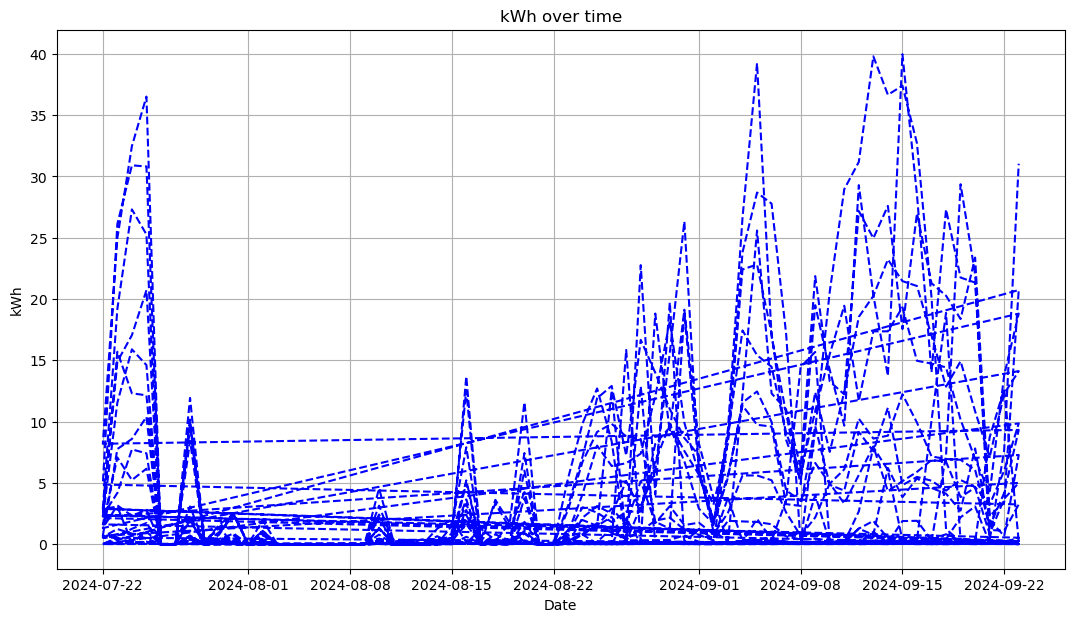

In [51]:
# Plotting kWh over time
plt.figure(figsize=(13, 7))
plt.plot(filtered_data['Date'], filtered_data['kwh'],
         linestyle='dashed', color='blue')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.title('kWh over time')
plt.grid()
plt.show()

In [52]:
filtered_data['Date'].max()

datetime.date(2024, 9, 23)

# Building model

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Creating lag features
filtered_data['kwh_lag1'] = filtered_data['kwh'].shift(1)
filtered_data['kwh_lag2'] = filtered_data['kwh'].shift(2)

# Rolling statistics
filtered_data['kwh_rolling_mean'] = filtered_data['kwh'].rolling(window=7).mean()
filtered_data['kwh_rolling_std'] = filtered_data['kwh'].rolling(window=7).std()

# Fill NaN values created due to lagging/rolling
filtered_data.fillna(method='bfill', inplace=True)

# Feature selection
features = ['current', 'v_red', 'v_blue', 'v_yellow', 'power_factor', 
            'kwh_lag1', 'kwh_lag2', 'kwh_rolling_mean', 'kwh_rolling_std']
X = filtered_data[features]
y = filtered_data['kwh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Random Forest with optimized parameters
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE - Random Forest: {rmse_rf}")

# Model 2: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"RMSE - Gradient Boosting: {rmse_gb}")

# Model 3: Ridge Regression for robustness
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE - Ridge Regression: {rmse_ridge}")

# Model Ensemble (Weighted Averaging)
y_pred_ensemble = (0.5 * y_pred_rf) + (0.3 * y_pred_gb) + (0.2 * y_pred_ridge)
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print(f"RMSE - Ensemble Model: {rmse_ensemble}")


RMSE - Random Forest: 2.199273933580909
RMSE - Gradient Boosting: 2.1714809883693618
RMSE - Ridge Regression: 2.7855889582933577
RMSE - Ensemble Model: 2.2012880923522453


In [54]:
y_train.std()

5.764437114752331

# Prediction of kWh for next 1 month

In [57]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Best trained model (Gradient Boosting Regressor)
best_model = gb_model  

# Future dates for the next month (starting from 2024-09-26)
future_dates = [datetime(2024, 9, 24) + timedelta(days=i) for i in range(30)]

# Unique users
unique_users = filtered_data["Source"].unique()

# StandardScaler fitted on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Store predictions
predictions = []

# Forecasting for each user separately
for user in unique_users:
    # Filter historical data for the user
    user_data = filtered_data[filtered_data["Source"] == user].copy()
    
    # Initialize lag features from historical data
    last_kwh_values = list(user_data["kwh"].iloc[-2:])  # Last two known values
    rolling_window = list(user_data["kwh"].iloc[-7:])  # Last 7 days for rolling stats

    for date in future_dates:
        # Construct feature input using the latest known values
        X_future = pd.DataFrame({
            "current": [user_data["current"].mean()],  
            "v_red": [user_data["v_red"].mean()],
            "v_blue": [user_data["v_blue"].mean()],
            "v_yellow": [user_data["v_yellow"].mean()],
            "power_factor": [user_data["power_factor"].mean()],
            "kwh_lag1": [last_kwh_values[-1]],  # Last predicted kWh
            "kwh_lag2": [last_kwh_values[-2]],  # Second last predicted kWh
            "kwh_rolling_mean": [np.mean(rolling_window)],  # Latest rolling mean
            "kwh_rolling_std": [np.std(rolling_window)]  # Latest rolling std
        })

        # Scale future data
        X_future_scaled = scaler.transform(X_future)

        # Predict kWh
        predicted_kwh = best_model.predict(X_future_scaled)[0]

        # Store prediction
        predictions.append({"ID": f"{date.strftime('%Y-%m-%d')}_{user}", "kwh": round(predicted_kwh, 2)})

        # Update rolling features dynamically
        last_kwh_values.append(predicted_kwh)
        last_kwh_values.pop(0)  # Remove the oldest value to keep it rolling
        
        rolling_window.append(predicted_kwh)
        if len(rolling_window) > 7:
            rolling_window.pop(0)  # Keep last 7 values for rolling mean/std

# Convert predictions to DataFrame
future_df = pd.DataFrame(predictions)

# RMSE on test set
test_preds = best_model.predict(scaler.transform(X_test))
final_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

# Display results
print("Final RMSE on Test Set:", final_rmse)

# Save predictions to CSV 
future_df.to_csv("predictions.csv", index=False)
future_df.head()


Final RMSE on Test Set: 2.1714809883693618


,ID,kwh
0,2024-09-24_consumer_device_10_data_user_1,1.81
1,2024-09-25_consumer_device_10_data_user_1,1.93
2,2024-09-26_consumer_device_10_data_user_1,1.91
3,2024-09-27_consumer_device_10_data_user_1,1.93
4,2024-09-28_consumer_device_10_data_user_1,1.92


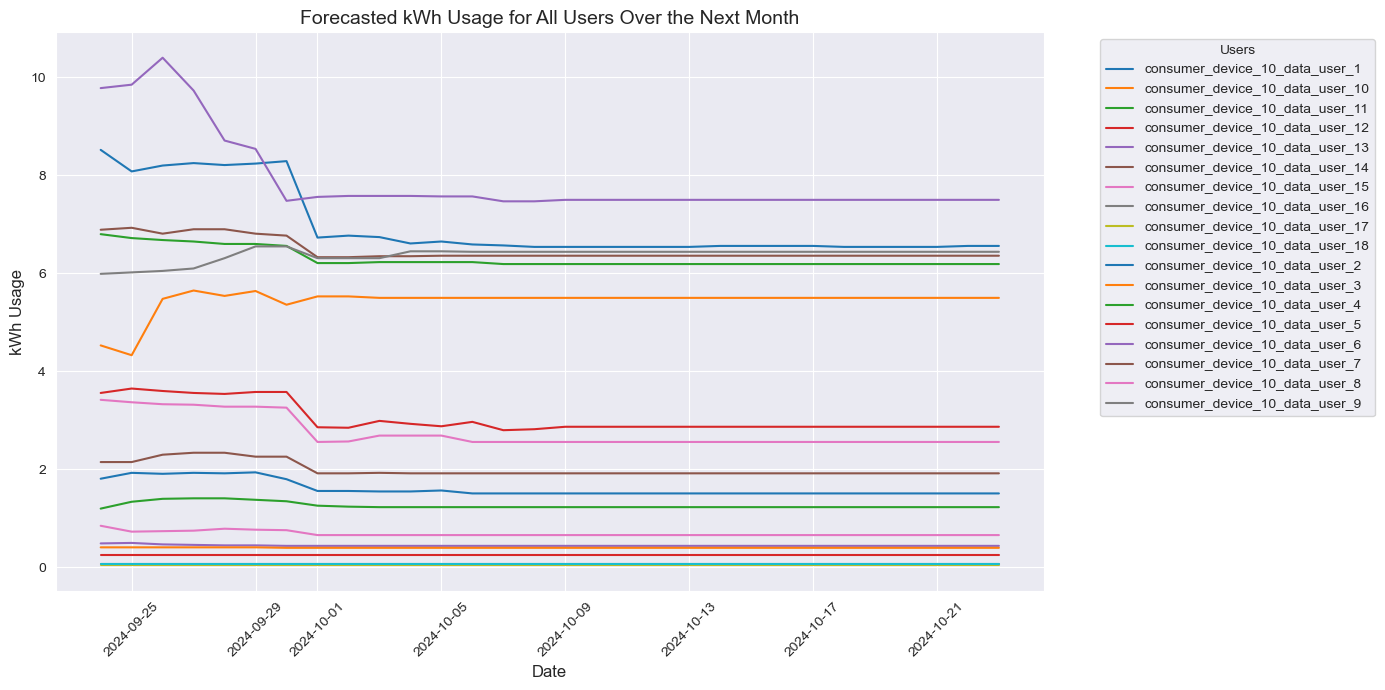

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'ID' column into separate 'date' and 'user' columns
future_df["date"] = future_df["ID"].apply(lambda x: x.split("_")[0])  # Extract date
future_df["user"] = future_df["ID"].apply(lambda x: "_".join(x.split("_")[1:]))  # Extract user

# Convert 'date' to datetime format
future_df["date"] = pd.to_datetime(future_df["date"])

# Set up the plot
plt.figure(figsize=(14, 7))
sns.set_style("darkgrid")

# Plot each user's kWh trend
for user in future_df["user"].unique():
    user_data = future_df[future_df["user"] == user]
    plt.plot(user_data["date"], user_data["kwh"], label=user)

# Customize the plot
plt.title("Forecasted kWh Usage for All Users Over the Next Month", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("kWh Usage", fontsize=12)
plt.legend(title="Users", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
